# SymPy Code Generation Survey

## Background

Earlier in 2022, Sam Brockie was hired as a postdoctoral researcher in Jason K. Moore's lab at TU Delft to [work on SymPy's code generation](https://groups.google.com/u/0/g/sympy/c/YC4PHG5etaA/m/IXRCdcwHBwAJ) as part of the [CZI grant](https://groups.google.com/g/sympy/c/vYsavewGj1w/m/CQKTSznPAgAJ).

For those not familiar with what code generation is, here's a quick explanation:

Oftentimes SymPy users will need to evaluate their symbolic expressions using numeric values. In simple cases, SymPy's `subs` and `evalf` methods can be used to substitute numeric values into symbolic expressions. However, this approach is slow. If your expressions are very large, or the numeric evaluations need to be done many times, then a different approach is required. Code generation is the process of automatically converting symbolic expressions into dedicated computer code for their numeric evaluation. SymPy offers a range of code generation tools supporting the simple creating of numeric Python functions equivalent to a symbolic expression (`lambdify`) and spanning to the creating, compiling, wrapping, and/or importing of efficient numeric C/Fortran/\<other language\> callables. Code generation can also be used to generate other code, such as LaTeX representations of SymPy objects.

More information about [code generation](https://docs.sympy.org/latest/reference/public/codegeneration/index.html) and [numeric computation](https://docs.sympy.org/latest/modules/numeric-computation.html) in SymPy can be found in the docs.

## Methodology

A user survey was conducted between 19th September and 17th October 2022. The approach mirrored that of the SymPy user survey about documentation conducted in February 2022.

The survey consisted of five short questions, predominantly multiple choice with the option to provide additional free-form information, plus to option to feed back anything else. It was conducted using Google Docs survey form and was advertised to SymPy users via the [SymPy mailing list](https://groups.google.com/g/sympy/c/7NOBPopo-9s/m/0lWrz19KAQAJ) and [SymPy Twitter account](https://twitter.com/SymPy/status/1571880390394269696).

The primary purpose of this survey was to gather information about which of, and how, SymPy's codegen features are used by SymPy's users. This information is intended to help inform Sam Brockie's work programme on SymPy's codegen throughout the duration of his work under the CZI grant.

## Summary

We would like to thank everyone who responsed to and shared the survey. A total of 24 responses were received. While we acknowledge that this is a relatively small sample size.

A detailed analysis is provided in the following sections, with a high level summary provided directly below:

1. SymPy's codegen is most used in the scientific research domain.
1. The most common language use case for codegen is doing numeric evaluation from Python.
1. `lambdify` is the most used codegen interface in SymPy.
1. When non-Python code is generated, C is the most common language used.
1. The most requested features/requests were:
    1. Improved documentation.
    1. Code generation of derivatives.


## Analysis

In [1]:
import collections
import textwrap

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')  # Set the plot format to SVG for better quality plots

%matplotlib inline

In [2]:
df = pd.read_csv('responses.csv')

In [3]:
(
    timestamp,
    experience_level_user,
    experience_level,
    use_case_user,
    use_case,
    use_case_extra,
    scientific_field,
    code_type_user,
    code_type,
    code_type_extra,
    target_language,
    codegen_tool_user,
    codegen_tool,
    codegen_tool_extra,
    lambdify_backend,
    *_,
) = df.columns

number_response = len(df)

#### Question 1: What is your experience level with SymPy?

Respondants were allowed to give a free-form response to this question. Responses were categorised during the analysis process into one of five categories based on which was the closest match:

0. No responses
0. Beginner
0. Intermediate
0. Advanced
0. Major contributor

Most respondants reported a moderate level of experience with SymPy.

In [4]:
EXPERIENCE_CATEGORY_MAPPING = {
    0: "No Response",
    1: "Beginner User",
    2: "Intermediate User",
    3: "Advanced User",
    4: "Major Contributor",
}

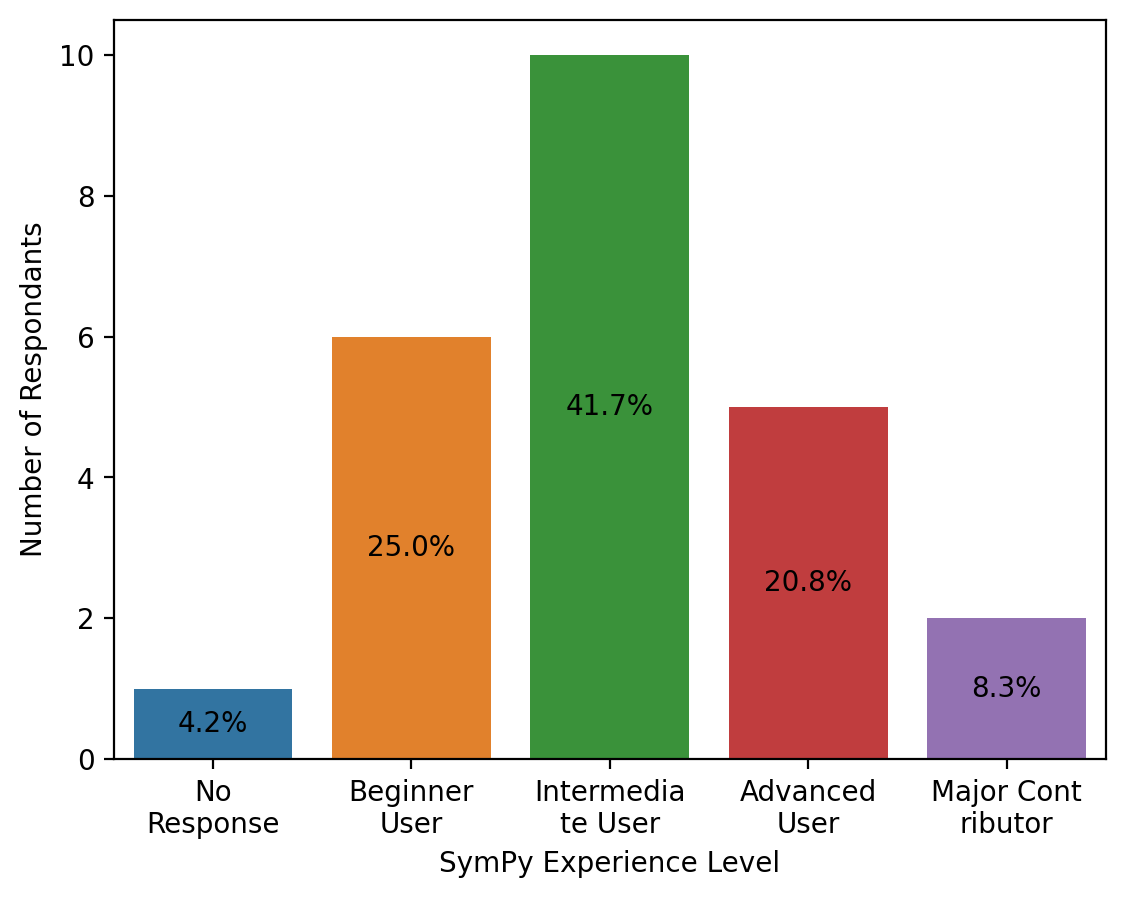

In [5]:
number_no_response = df[experience_level].isna().sum()

experience_category_no_response = pd.Series({"0": number_no_response})
experience_category_response = df[experience_level].dropna().astype(int).value_counts(sort=False).sort_index()
experience_category = pd.concat([experience_category_no_response, experience_category_response])

experience_category_proportion = (experience_category / number_response) * 100
experience_category_proportion = [f"{proportion:.1f}%" for proportion in experience_category_proportion]

ax = sns.countplot(x=df[experience_level].fillna(0).astype(int).astype("category"))
ax.bar_label(ax.containers[0], experience_category_proportion, label_type='center')
ax.set_xticklabels(list(EXPERIENCE_CATEGORY_MAPPING.values()))
ax.set_xlabel("SymPy Experience Level")
ax.set_ylabel("Number of Respondants")
_ = ax.set_xticklabels(textwrap.fill(x.get_text(), 10) for x in ax.get_xticklabels())

#### Question 2: What do you use SymPy's code generation for?

This question intended to find out how SymPy's code generation is used in practice. This question gave respondants the option to select as many of the following five use cases as they wished:

1. For debugging symbolic code;
1. In notebooks/simple scripts that are run few times;
1. In scientific research (which field? e.g. machine learning, chemistry, robotics etc.);
1. In production code; or
1. To generate code for use within a library (which one? please specify below).

The spectrum of options here could help inform where development should be focussed. For example, if the majority of respondants use code generation for debugging or in simple scripts, then it could indicate that improvements to error messaging would be a more useful addition. Conversely, if the majority of respondants use code generation in production code or to generate code for use within another library, then it is likely that improvements to computational performance and numerical stability would be best received.

Libraries noted in responses included:

1. [asymptote](https://asymptote.sourceforge.io/doc/Interactive-mode.html)
1. [python-control](https://python-control.readthedocs.io/en/0.9.2/)
1. [pycollo](https://github.com/brocksam/pycollo)
1. [pydy](https://pydy.readthedocs.io/en/stable/)
1. [opty](https://opty.readthedocs.io/en/latest/)
1. [py-pde](https://py-pde.readthedocs.io/en/latest/getting_started.html)
1. [pysisyphus](https://pysisyphus.readthedocs.io/en/latest/)

In [6]:
USE_CASE_MAPPING = {
    0: "No Response",
    1: "Debugging Symbolic Code",
    2: "In Notebooks/Scripts",
    3: "In Scientific Research",
    4: "In Production Code",
    5: "In Library Code",
}

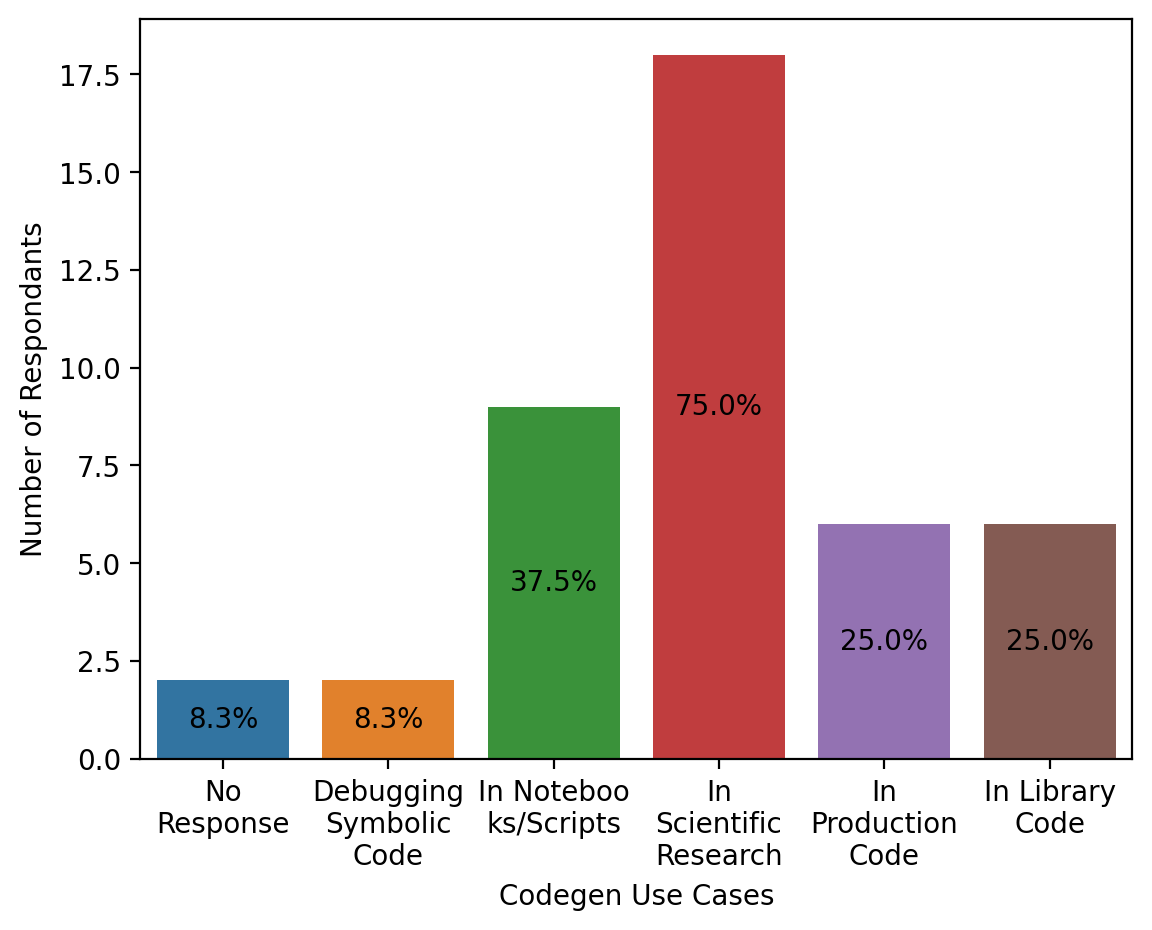

In [7]:
use_case_count = collections.Counter()
for response in df[use_case].fillna(0).astype("str"):
    use_case_count.update(response.split(","))
    
use_case_df = pd.Series(use_case_count, name="use case").sort_index().to_frame()
use_case_proportion = [f"{((user / number_response) * 100):.1f}%" for user in use_case_df["use case"]]

ax = sns.barplot(x=use_case_df.index, y=use_case_df["use case"])
ax.bar_label(ax.containers[0], use_case_proportion, label_type='center')
ax.set_xticklabels(list(USE_CASE_MAPPING.values()))
ax.set_xlabel("Codegen Use Cases")
ax.set_ylabel("Number of Respondants")
_ = ax.set_xticklabels(textwrap.fill(x.get_text(), 10) for x in ax.get_xticklabels())

75% of respondants reported using SymPy's code generation in scientific research. The two most common scientific fields stated were mechanics and control. However, it should be noted that such a categorization is limited due to the potential overlap, or difference, between work in such areas. For example, it is possible that there is significant overlap in how respondants use SymPy for mechanics, biomechanics, and robotics work as all involve multibody modelling and likely leverage `sympy.physics.mechanics`.

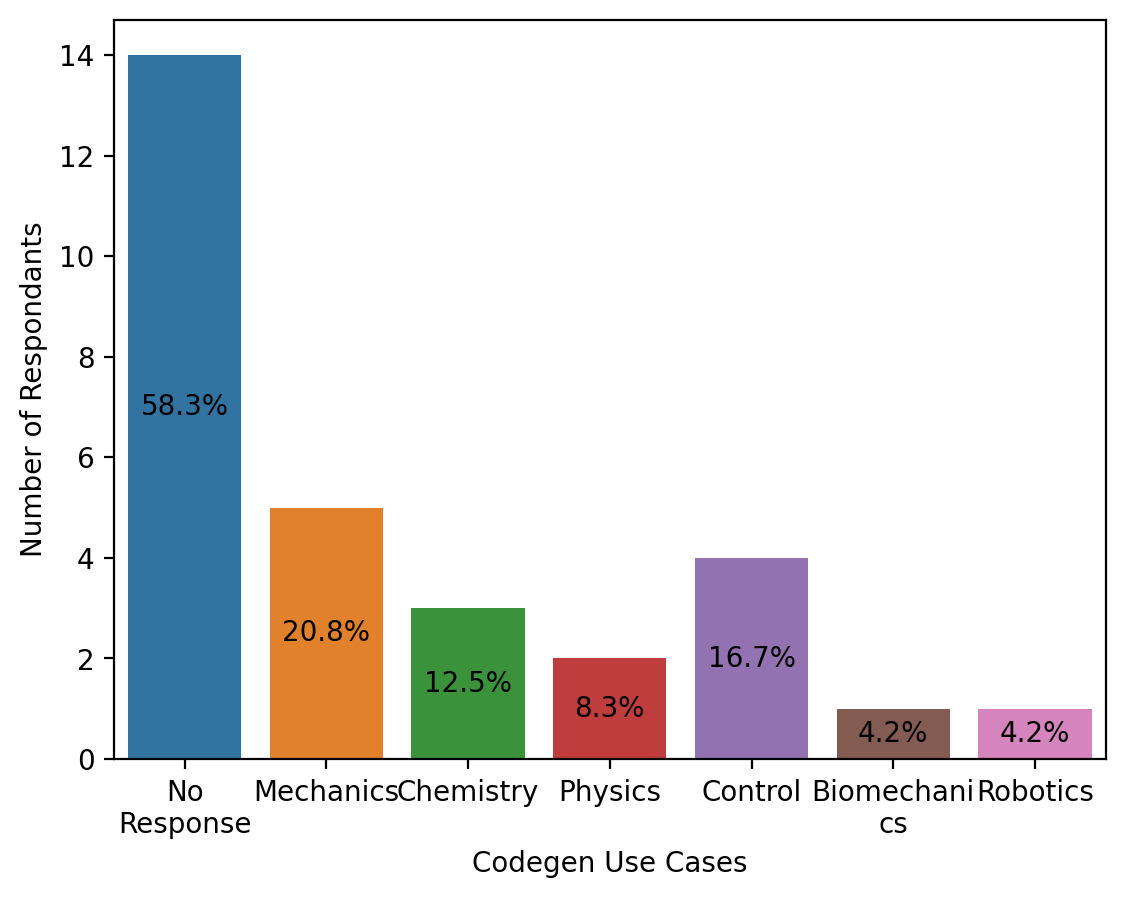

In [8]:
scientific_field_count = collections.Counter()
for response in df[scientific_field].fillna("No Response").astype("str"):
    scientific_field_count.update(response.split(","))
    
scientific_field_df = pd.Series(scientific_field_count, name="scientific field").to_frame()
scientific_field_proportion = [f"{((user / number_response) * 100):.1f}%" 
                               for user in scientific_field_df["scientific field"]]

ax = sns.barplot(x=scientific_field_df.index, y=scientific_field_df["scientific field"])
ax.bar_label(ax.containers[0], scientific_field_proportion, label_type='center')
ax.set_xticklabels(list(scientific_field_count.keys()))
ax.set_xlabel("Codegen Use Cases")
ax.set_ylabel("Number of Respondants")
_ = ax.set_xticklabels(textwrap.fill(x.get_text(), 10) for x in ax.get_xticklabels())

#### Question 3: What type of code do you generate using SymPy?

This question intended to find out about the intended use for SymPy's code generation. This question gave respondants the option to select as many of the following three cases as they wished:

1. Code that can be called from Python.
1. Code that can be called from another language.
1. Code snippets to copy-paste into non-Python code.

For instances where non-Python code is being generated, the following languages were mentioned:

1. C
1. C++
1. Julia
1. Matlab
1. Fortran
1. Rust
1. R
1. Theano

In [9]:
CODE_TYPE_MAPPING = {
    0: "No Response",
    1: "Call from Python",
    2: "Call from Another Language",
    3: "Copy-Paste into Non-Python Code",
}

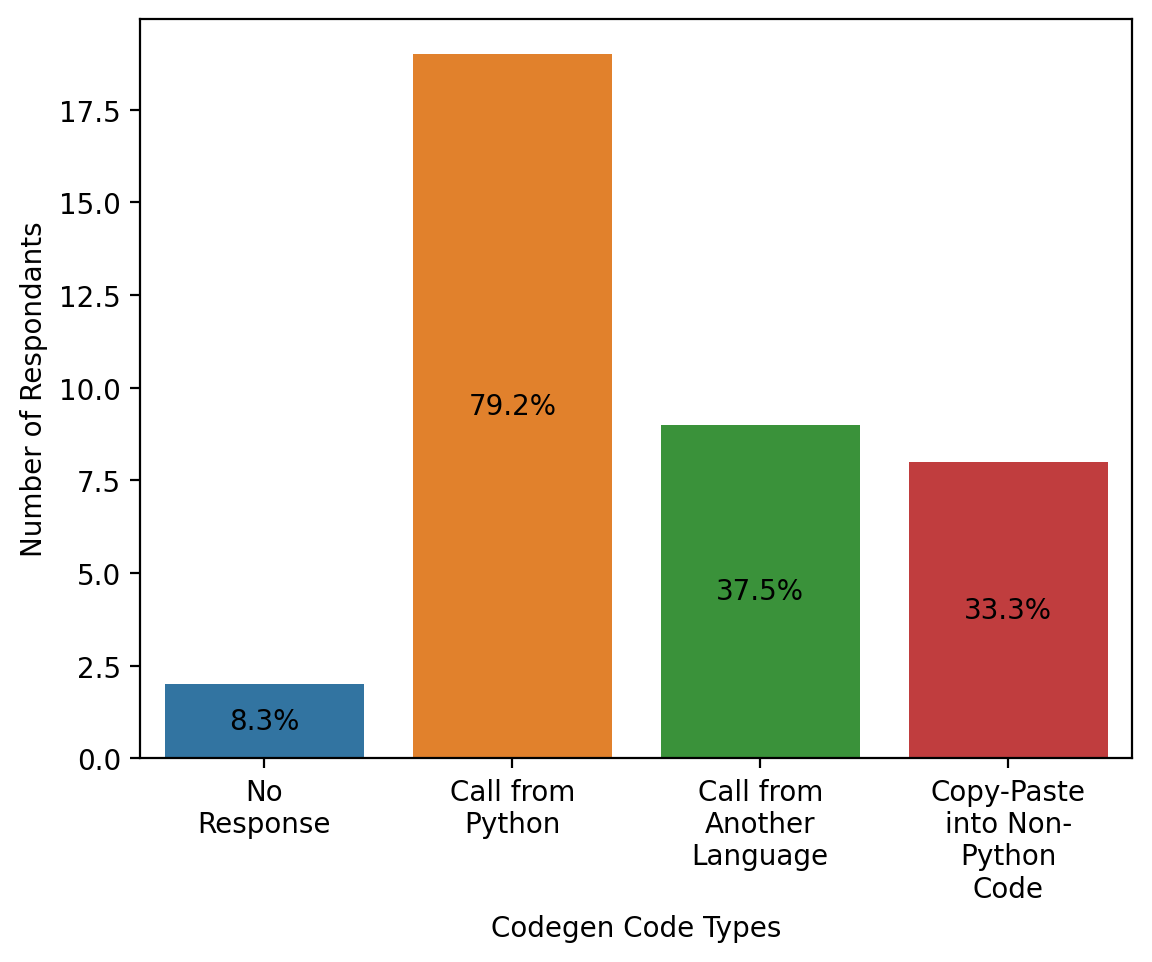

In [10]:
code_type_count = collections.Counter()
for response in df[code_type].fillna(0).astype("str"):
    code_type_count.update(response.split(","))
    
code_type_df = pd.Series(code_type_count, name="code type").sort_index().to_frame()
code_type_proportion = [f"{((user / number_response) * 100):.1f}%" for user in code_type_df["code type"]]

ax = sns.barplot(x=code_type_df.index, y=code_type_df["code type"])
ax.bar_label(ax.containers[0], code_type_proportion, label_type='center')
ax.set_xticklabels(list(CODE_TYPE_MAPPING.values()))
ax.set_xlabel("Codegen Code Types")
ax.set_ylabel("Number of Respondants")
_ = ax.set_xticklabels(textwrap.fill(x.get_text(), 10) for x in ax.get_xticklabels())

The majority of respondants stated that they use SymPy's code generation to generate code that can be called from Python. This indicates that functions like `lambdify`, `autowrap`, and `ufuncify` are important to the majority of SymPy users that leverage code generation.

A significant portion of respondants also stated that they use code generation features to generate non-Python code that can be used outside Python. This indicates that SymPy's code printing features are also leveraged by a significant number of users too.

The most common non-Python target language for code generation is C, with 25% of respondants stating that they had used SymPy's code generation to target C. Following C, the other most common language targets are C++ and Julia, with 16.7% and 12.5% of users stating that they had targetted them respectively.

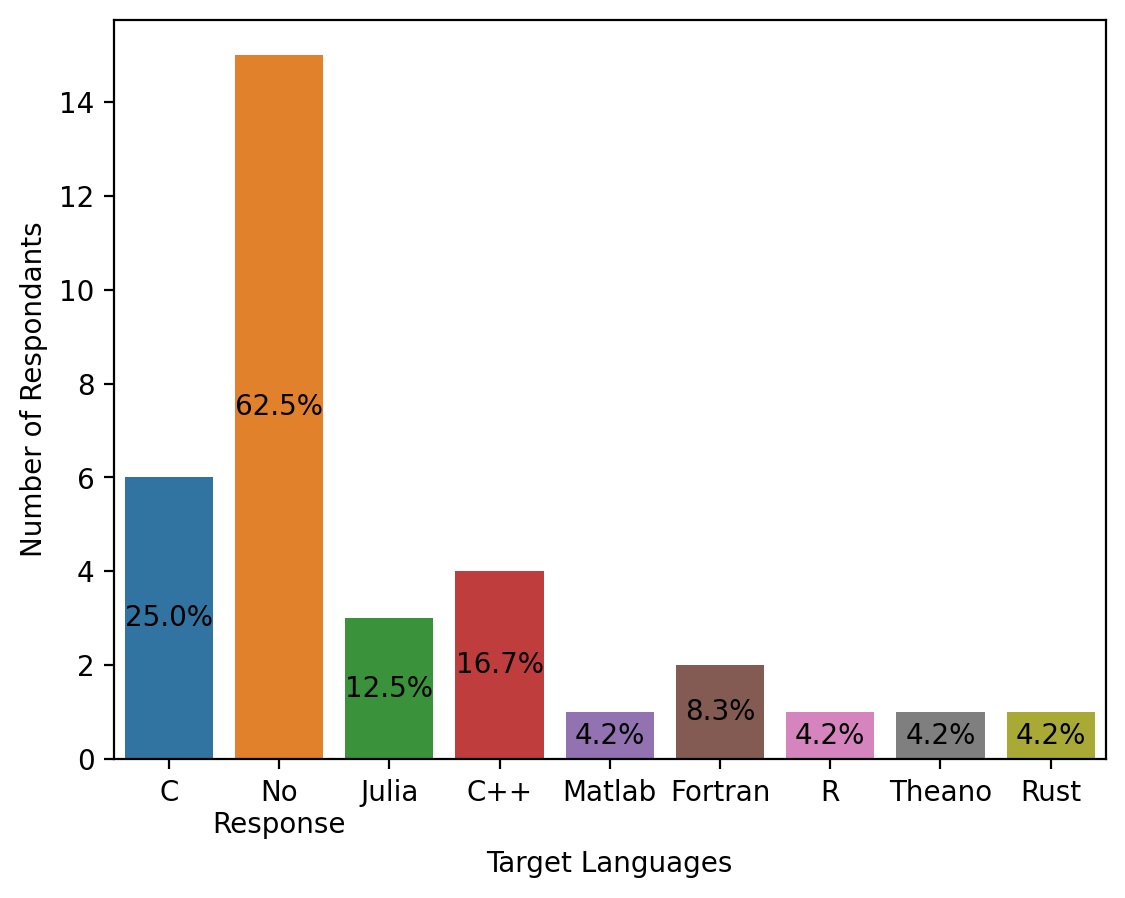

In [11]:
target_language_count = collections.Counter()
for response in df[target_language].fillna("No Response").astype("str"):
    target_language_count.update(response.split(","))
    
target_language_df = pd.Series(target_language_count, name="target language").to_frame()
target_language_proportion = [f"{((users / number_response) * 100):.1f}%" 
                              for users in target_language_df["target language"]]

ax = sns.barplot(x=target_language_df.index, y=target_language_df["target language"])
ax.bar_label(ax.containers[0], target_language_proportion, label_type='center')
ax.set_xticklabels(list(target_language_count.keys()))
ax.set_xlabel("Target Languages")
ax.set_ylabel("Number of Respondants")
_ = ax.set_xticklabels(textwrap.fill(x.get_text(), 10) for x in ax.get_xticklabels())

#### Question 4: Which SymPy code generation tools do you use?

This question intended to find out which of SymPy's code generation interfaces are most commonly used. This question gave respondants the option to select as many of the following five cases as they wished:

1. [Lambdify](https://docs.sympy.org/latest/modules/utilities/lambdify.html?highlight=lambdify#sympy.utilities.lambdify.lambdify)
1. [Autowrap](https://docs.sympy.org/latest/modules/utilities/autowrap.html?highlight=autowrap#sympy.utilities.autowrap.autowrap)
1. [Ufuncify](https://docs.sympy.org/latest/modules/utilities/autowrap.html?highlight=ufuncify#sympy.utilities.autowrap.ufuncify)
1. [Printers](https://docs.sympy.org/latest/modules/printing.html?highlight=printer#module-sympy.printing.printer)
1. [subs/evalf](https://docs.sympy.org/latest/modules/numeric-computation.html?highlight=subs+evalf#subs-evalf)

Additional information was requested about which Lambdify backends and code printers are most used by respondants. Lambdify backends mentioned include:

1. [NumPy](https://numpy.org)
1. [SciPy](https://scipy.org)
1. [JAX](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html)
1. [mpmath](https://mpmath.org)

In [12]:
CODEGEN_TOOL_MAPPING = {
    0: "No Response",
    1: "Lambdify",
    2: "Autowrap",
    3: "Ufuncify",
    4: "Printers",
    5: "Subs/Evalf",
}

In [13]:
codegen_tool_counts = collections.Counter()
for response in df[codegen_tool].fillna(0).astype("str"):
    codegen_tool_counts.update(response.split(","))
    
codegen_tool_df = pd.Series(codegen_tool_counts, name="codegen tool").sort_index().to_frame()
codegen_tool_proportions = [f"{((users / number_responses) * 100):.1f}%" for users in codegen_tool_df["codegen tool"]]

ax = sns.barplot(x=codegen_tool_df.index, y=codegen_tool_df["codegen tool"])
ax.bar_label(ax.containers[0], codegen_tool_proportions, label_type='center')
ax.set_xticklabels(list(CODEGEN_TOOL_MAPPING.values()))
ax.set_xlabel("Codegen Tools")
ax.set_ylabel("Number of Respondants")
_ = ax.set_xticklabels(textwrap.fill(x.get_text(), 10) for x in ax.get_xticklabels())

NameError: name 'number_responses' is not defined

The majority of respondants stated that they use Lamdify as the primary interface into SymPy's code generation. This likely relates to the fact that most respondants also stated that they primarily generate code that can be called from Python.

NumPy was the most used backend for Lambdify, with 33.3% of respondants stating that they use it. This was followed by JAX, newly [added in June 2022](https://github.com/sympy/sympy/pull/23627), with 12.5% of respondants. NumPy is likely the most commonly used backend for Lambdify as it is the default option. Three respondants also stated that they use [Numba](https://numba.pydata.org) to [JIT compile](https://en.wikipedia.org/wiki/Just-in-time_compilation) the functions returned by Lambdify.

In [ ]:
lambdify_backend_counts = collections.Counter()
for response in df[lambdify_backend].fillna("No Response").astype("str"):
    lambdify_backend_counts.update(response.split(","))
    
lambdify_backend_df = pd.Series(lambdify_backend_counts, name="lambdify backend").to_frame()
lambdify_backend_proportions = [f"{((users / number_responses) * 100):.1f}%" 
                                for users in lambdify_backend_df["lambdify backend"]]

ax = sns.barplot(x=lambdify_backend_df.index, y=lambdify_backend_df["lambdify backend"])
ax.bar_label(ax.containers[0], lambdify_backend_proportions, label_type='center')
ax.set_xticklabels(list(lambdify_backend_counts.keys()))
ax.set_xlabel("Lambdify Backends")
ax.set_ylabel("Number of Respondants")
_ = ax.set_xticklabels(textwrap.fill(x.get_text(), 10) for x in ax.get_xticklabels())

#### Question 5: What do we need to improve about SymPy's code generation?

#### Question 6: Are there any other comments you'd like to make?